In [1]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='DHG.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
#data=data['2019-04-01':]

In [2]:
y=data.resample('W').mean()
steps=1
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=steps,disp=False)

['DHG.AX', 0, 1, 1, 1, 1, 0, 12, 'ct', -34.233846996796196, 0.0006499147097254188]


[0, 1, 1] [1, 1, 0, 12] ct


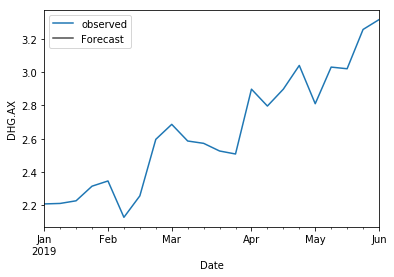

In [3]:
y=data.resample('W').mean()
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error


train_y, test_y = y[:-steps], y[-steps:]

p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))


pred_ci=pd.DataFrame(index=forcast.index)
pred_ci['low'] = forcast-forcast*0.05
pred_ci['upper'] = forcast+forcast*0.05


#pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
#pred_ci=pred_ci.sort_index()
ax = y['2019-01-01':].plot(label='observed')
forcast.plot(ax=ax, label='Forecast',color='k', alpha=.7)

#ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel(ticker)
plt.legend()

plt.show()


Date
2017-11-19    3.522348
2017-11-26    3.380292
2017-12-03    3.339612
2017-12-10    3.343487
2017-12-17    3.415161
2017-12-24    3.394821
2017-12-31    3.306036
2018-01-07    3.347361
2018-01-14    3.202076
2018-01-21    3.099408
2018-01-28    3.009816
2018-02-04    3.068414
2018-02-11    2.903758
2018-02-18    2.814650
2018-02-25    3.012313
2018-03-04    2.978877
2018-03-11    2.978877
2018-03-18    3.041673
2018-03-25    3.137829
2018-04-01    3.162686
2018-04-08    3.078467
2018-04-15    3.010275
2018-04-22    3.010275
2018-04-29    3.009784
2018-05-06    3.116243
2018-05-13    3.218286
2018-05-20    3.363502
2018-05-27    3.255571
2018-06-03    3.212399
2018-06-10    3.086808
                ...   
2018-11-04    2.480916
2018-11-11    2.461069
2018-11-18    2.365802
2018-11-25    2.431298
2018-12-02    2.449160
2018-12-09    2.391603
2018-12-16    2.403512
2018-12-23    2.260611
2018-12-30    2.199746
2019-01-06    2.208015
2019-01-13    2.210992
2019-01-20    2.226870
2019-0

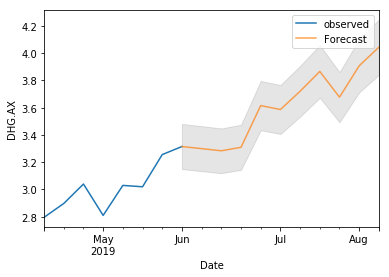

In [4]:
print(train_y)
print(test_y)
print(forcast) 
if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=10,disp=True,days=50)
else:
    print("wrong parameters",len(parameters))

In [5]:
result
sres=pd.DataFrame()
sres[ticker]=result
sres

,DHG.AX
2019-06-02,3.315000
2019-06-09,3.299632
2019-06-16,3.283926
2019-06-23,3.309369
2019-06-30,3.615432
2019-07-07,3.586402
2019-07-14,3.720404
2019-07-21,3.865769
2019-07-28,3.677013
2019-08-04,3.907045


In [6]:
sres=sres.transpose()
rate=sres[sres.columns[-1]]/sres[sres.columns[0]]
rate
dd=pd.DataFrame()
x=rate*500-500
dd['benefit']=x
dd['rate']=rate
dd[sres.columns[-0]]=sres[sres.columns[-3]]
dd[sres.columns[-2]]=sres[sres.columns[-2]]
dd[sres.columns[-1]]=sres[sres.columns[-1]]


dd.sort_values(by='benefit',ascending=False).head(300)


,benefit,rate,2019-06-02 00:00:00,2019-08-04 00:00:00,2019-08-11 00:00:00
DHG.AX,109.861409,1.219723,3.677013,3.907045,4.043381
